In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
import nltk
nltk.download('stopwords')
data = pd.read_csv("IMDB Dataset.csv")
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [6]:
#Data Preparation, Tokenization, Stopwords Removal and Stemming
#Our textual dataset needs preparation before being used for any problem based on NLP. Here we will:

#remove links and all the special characters from the review column
#tokenize and remove the stopwords from the review column
#stem the words in the review column
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['review'] = data['review'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


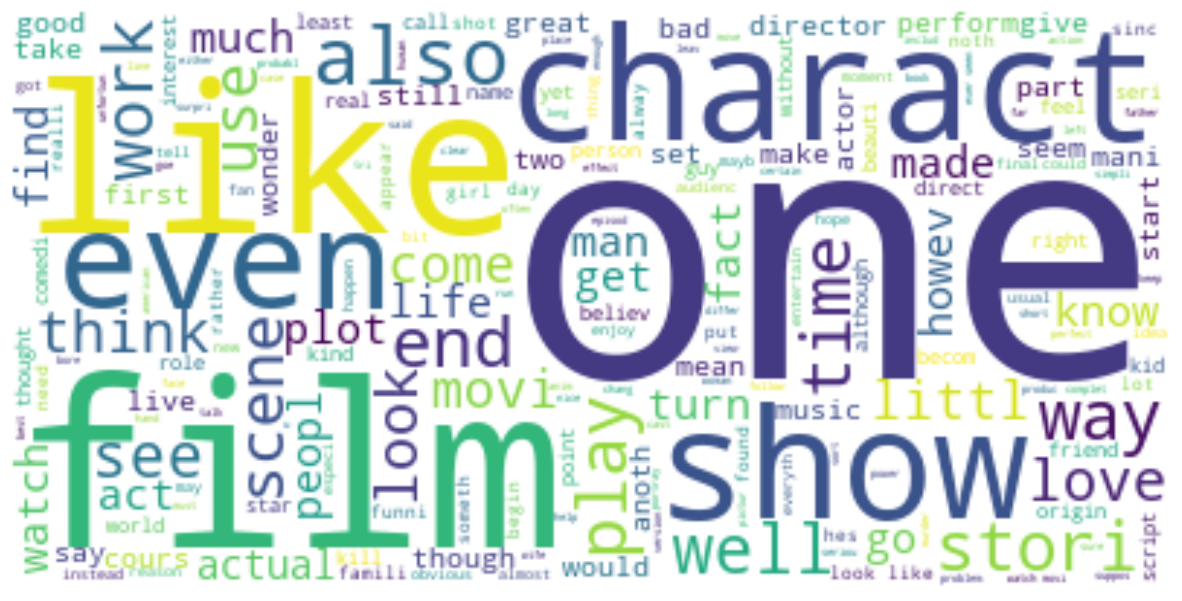

In [8]:
#Before moving forward, let’s have a quick look at the wordcloud of the review column:
from multiprocessing.resource_sharer import stop
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopword, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
#Text Vectorization
#The next step is text vectorization. It means to transform all the text tokens into numerical vectors. Here I will first perform text vectorization on the feature column (review column) and then split the data into training and test sets:
x = np.array(data['review'])
y = np.array(data['sentiment'])

cv = CountVectorizer()
x = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [11]:
#Text Classification
#The final step in the process of NLP is to classify or cluster texts. 
#As we are working on the problem of sentiment classification, we will now train a text classification model.
#Here’s how to prepare a text classification model for sentiment classification:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)

#The dataset we used to train a sentiment classification model contains movie reviews.
#So let’s test the model by giving a movie review as an input:
user = input('Enter a Text: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

In [ ]:
#While working on any problem of NLP, we first need to:

#find a textual dataset
#then prepare the dataset by tokenization, stopwords removal, and stemming
#then perform text vectorization
#and then the last step is text classification or clustering